**Home Assignment - PulseNMore_Rotem Stahl**

In the following home assignment i was asked to analyze data from a sample of 51 devices, using the specific libraries numpy, pandas, and matplotlib. No other libraries are allowed for this analysis.

The dataset contains 5 dependent variables Y1 ... Y5 and 4 independent variables X2 ... X5, such that the variable Yi corresponds to Xi, except for Y1 which has no X variable.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Part 1 - Data Loading and Description**

Load the data from 'factory_test.csv' and provide a description of its contents


In [13]:
rawdata = pd.read_csv('factory_test_data.csv')
new_devices = pd.read_csv('new_devices.csv')

In [7]:
rawdata.describe()

# Replace empty lists with NaN (modifies 'rawdata' in place)
rawdata.replace('[]', np.nan, inplace=True)

# Convert all applicable columns to numeric data type
data = rawdata.apply(pd.to_numeric)

data.describe()

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
count,51.000000,47.0,47.000000,47.0,47.000000,47.0,47.000000,47.0,47.000000
mean,1504.960784,18.0,17.425957,14.0,13.452340,12.0,11.673830,9.0,8.346383
std,71.384861,0.0,4.275727,0.0,0.123732,0.0,1.226748,0.0,0.295807
min,1487.000000,18.0,7.870000,14.0,13.190000,12.0,9.100000,9.0,7.810000
25%,1493.000000,18.0,14.825000,14.0,13.395000,12.0,10.965000,9.0,8.195000
50%,1495.000000,18.0,18.000000,14.0,13.450000,12.0,11.500000,9.0,8.330000
75%,1497.000000,18.0,20.250000,14.0,13.520000,12.0,12.355000,9.0,8.555000
max,2004.000000,18.0,25.260000,14.0,13.990000,12.0,14.560000,9.0,9.160000


# Looking at the information about the raw data i notices some data points contain [] instsad of NaN, and X values were not numeric values. in ordar to use the data I did basic manipulation - changing [] to NaN and changing the data to be a numeric value.

# **2. Data Visualization and Explanation**

Visualize the data and explain the observed patterns or trends.

In [8]:
def plot4(data,title):
  fig, ax = plt.subplots(2, 2)

  ax[0, 0].scatter(data.X2, data.Y2 )
  ax[0, 0].set_xlabel('X2')
  ax[0, 0].set_ylabel('Y2')
  tl1=('Y2 mean={}, Y2 STD={}, Y2 median={}'.format(round(data.Y2.mean(),4) , round(data.Y2.std(),4), round(data.Y2.median(),4)))
  ax[0, 0].set_title(tl1,fontsize=7)


  ax[0, 1].scatter(data.X3, data.Y3)
  ax[0, 1].set_xlabel('X3')
  ax[0, 1].set_ylabel('Y3')
  tl2=('Y3 mean={}, Y3 STD={}, Y3 median={}'.format(round(data.Y3.mean(),4) , round(data.Y3.std(),4), round(data.Y3.median(),4)))
  ax[0, 1].set_title(tl2,fontsize=7)

  ax[1, 0].scatter(data.X4, data.Y4)
  ax[1, 0].set_xlabel('X4')
  ax[1, 0].set_ylabel('Y4')
  tl3=('Y4 mean={}, Y4 STD={}, Y4 median={}'.format(round(data.Y4.mean(),4) , round(data.Y4.std(),4), round(data.Y4.median(),4)))
  ax[1, 0].set_title(tl3,fontsize=7)

  ax[1, 1].scatter(data.X5, data.Y5)
  ax[1, 1].set_xlabel('X5')
  ax[1, 1].set_ylabel('Y5')
  tl4=('Y5 mean={}, Y5 STD={}, Y5 median={}'.format(round(data.Y5.mean(),4) , round(data.Y5.std(),4), round(data.Y5.median(),4)))
  ax[1, 1].set_title(tl4,fontsize=7)

  fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
  plt.suptitle(title)
  plt.tight_layout()
  plt.show()

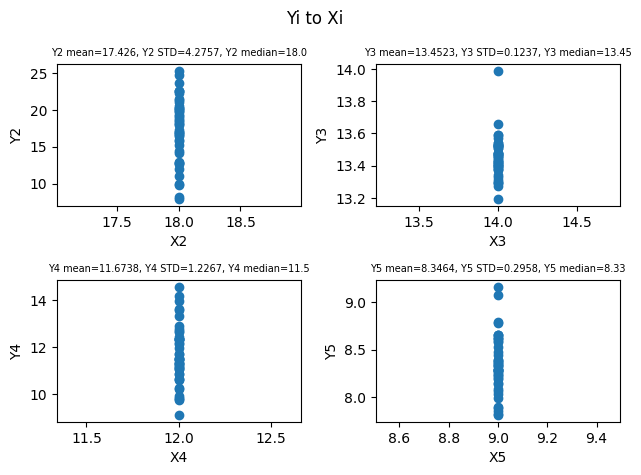

In [9]:
plot4(data,'Yi to Xi')

#First impression
Looking at my initial data visualization - we can see that Yi changes but Xi is the same for all samples, which indicates that Xi might be a goal of a measurement, the background of the environment, or any other measurement relevant to our data.
looking at our data we see that Yi we see the mean and median are close to the value of Xi for all i, but the destribution around it changes.
Y2 is distributed roughly even around X2, and Y4 and X4 are the same.
Y3 is always smaller than X3, and besides one point it is even smaller than one size bigger than it.
Y5 is distributed to be smaller than X5, with a small number of points that are bigger than X5. They might be outliers.

In [10]:

# Find rows with missing values
missing_rows = data[data.isnull().any(axis=1)]

# Remove rows with missing values
data = data.dropna()

#now we have smaller counck of data, with less nulls and more managable



Y1 being an independent variable without a corresponding X might indicate it changes according to all X's, knowing our X might be goals or environment data- let's check the connection between Y1 and Yi.
#I will be plotting Y1(Yi) and checking to see for trends and patterns

In [11]:
def plot4_2(data,title):
  fig, ax = plt.subplots(2, 2)

  ax[0, 0].scatter(data.Y2, data.Y1 )
  ax[0, 0].set_xlabel('Y2 (X2={})'.format(data.X2[0]))
  ax[0, 0].set_ylabel('Y1')
  tl1=('Y2 mean={}, Y2 STD={}, Y2 median={}'.format(round(data.Y2.mean(),4) , round(data.Y2.std(),4), round(data.Y2.median(),4)))
  ax[0, 0].set_title(tl1,fontsize=7)


  ax[0, 1].scatter(data.Y3, data.Y1)
  ax[0, 1].set_xlabel('Y3 (X3={})'.format(data.X3[0]))
  ax[0, 1].set_ylabel('Y1')
  tl2=('Y3 mean={}, Y3 STD={}, Y3 median={}'.format(round(data.Y3.mean(),4) , round(data.Y3.std(),4), round(data.Y3.median(),4)))
  ax[0, 1].set_title(tl2,fontsize=7)

  ax[1, 0].scatter(data.Y4, data.Y1)
  ax[1, 0].set_xlabel('Y4 (X4={})'.format(data.X4[0]))
  ax[1, 0].set_ylabel('Y1')
  tl3=('Y4 mean={}, Y4 STD={}, Y4 median={}'.format(round(data.Y4.mean(),4) , round(data.Y4.std(),4), round(data.Y4.median(),4)))
  ax[1, 0].set_title(tl3,fontsize=7)

  ax[1, 1].scatter(data.Y5, data.Y1)
  ax[1, 1].set_xlabel('Y5 (X5={})'.format(data.X5[0]))
  ax[1, 1].set_ylabel('Y1')
  tl4=('Y5 mean={}, Y5 STD={}, Y5 median={}'.format(round(data.Y5.mean(),4) , round(data.Y5.std(),4), round(data.Y5.median(),4)))
  ax[1, 1].set_title(tl4,fontsize=7)

  fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


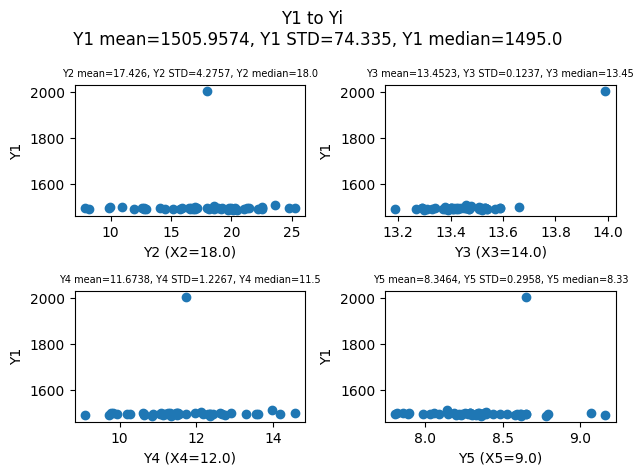

In [12]:
title = ('Y1 to Yi \n Y1 mean={}, Y1 STD={}, Y1 median={}'.format(round(data.Y1.mean(),4) , round(data.Y1.std(),4), round(data.Y1.median(),4)))
plot4_2(data,title)

# **we can see we have one Y1 value being an obvious ourliar, let's remove it and look again at our data.**

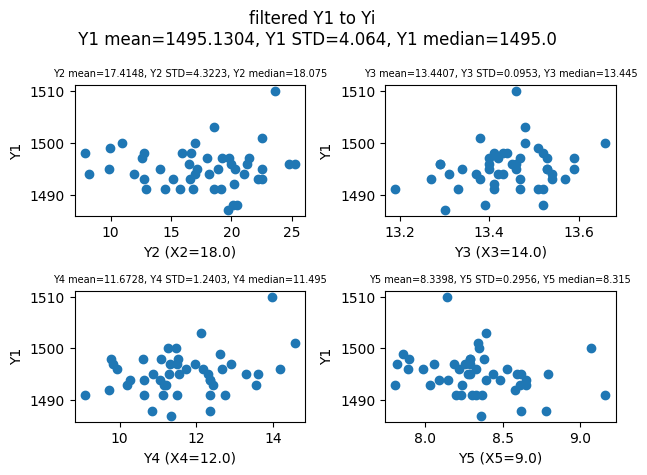

In [14]:
# Identify the outlier value
outlier_value = max(data.Y1)

#Filter the outlier
data = data[data['Y1'] != outlier_value]

#new plot without the outlier
title = ('filtered Y1 to Yi \n Y1 mean={}, Y1 STD={}, Y1 median={}'.format(round(data.Y1.mean(),4) , round(data.Y1.std(),4), round(data.Y1.median(),4)))
plot4_2(data,title)

we can see our Y1 STD is a lot smaller now, while the rest of the statistics are almost the same, and our data looks a lot better - we can start looking for trends and patterns, Let look at the way the data goes around the X value with a histogram and look for the CI

In [52]:
def plot5hist(data,title):

  #finding the CI
  conf = 0.95
  ci95_1 = np.percentile(data.Y1, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_2 = np.percentile(data.Y2, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_3 = np.percentile(data.Y3, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_4 = np.percentile(data.Y4, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_5 = np.percentile(data.Y5, [100*(1-conf)/2,100*(1-(1-conf)/2)])

  fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))

  ax1.hist(data.Y1,  alpha=0.5, color='blue', density=True)
  ax1.axvline(data.Y1.mean(), color='red', linestyle='dashed', linewidth=2)
  ax1.axvline(ci95_1[0], color='black', linestyle='solid', linewidth=1.5)
  ax1.axvline(ci95_1[1], color='black', linestyle='solid', linewidth=1.5)
  ax1.set_xlabel('Y1')
  ax1.set_ylabel('Density')
  ax1.set_title('Y1 histogram')
  leg=['Y1 mean','CI','CI','Y1 data']
  ax1.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  ax2.hist(data.Y2, alpha=0.5, color='green', density=True)
  ax2.axvline(data.Y2.mean(), color='red', linestyle='dashed', linewidth=2)
  ax2.axvline(data.X2[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax2.axvline(ci95_2[0], color='black', linestyle='solid', linewidth=1.5)
  ax2.axvline(ci95_2[1], color='black', linestyle='solid', linewidth=1.5)
  ax2.set_xlabel('Y2')
  ax2.set_ylabel('Density')
  ax2.set_title('Y2 histogram')
  leg=['Y2 mean','X2=18','CI','CI','Y2 data']
  ax2.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax3.hist(data.Y3,  alpha=0.5, color='orange', density=True)
  ax3.axvline(data.Y3.mean(), color='red', linestyle='dashed', linewidth=2)
  ax3.axvline(data.X3[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax3.axvline(ci95_3[0], color='black', linestyle='solid', linewidth=1.5)
  ax3.axvline(ci95_3[1], color='black', linestyle='solid', linewidth=1.5)
  ax3.set_xlabel('Y3')
  ax3.set_ylabel('Density')
  ax3.set_title('Y3 histogram')
  leg=['Y3 mean','X3=14','CI','CI','Y3 data']
  ax3.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax4.hist(data.Y4,  alpha=0.5, color='purple', density=True)
  ax4.axvline(data.Y4.mean(), color='red', linestyle='dashed', linewidth=2)
  ax4.axvline(data.X4[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax4.axvline(ci95_4[0], color='black', linestyle='solid', linewidth=1.5)
  ax4.axvline(ci95_4[1], color='black', linestyle='solid', linewidth=1.5)
  ax4.set_xlabel('Y4')
  ax4.set_ylabel('Density')
  ax4.set_title('Y4 histogram')
  leg=['Y4 mean','X4=12','CI','CI','Y4 data']
  ax4.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax5.hist(data.Y5,  alpha=0.5, color='teal', density=True)
  ax5.axvline(data.Y5.mean(), color='red', linestyle='dashed', linewidth=2)
  ax5.axvline(data.X5[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax5.axvline(ci95_5[0], color='black', linestyle='solid', linewidth=1.5)
  ax5.axvline(ci95_5[1], color='black', linestyle='solid', linewidth=1.5)
  ax5.set_xlabel('Y5')
  ax5.set_ylabel('Density')
  ax5.set_title('Y5 histogram')
  leg=['Y5 mean','X5=9','CI','CI','Y5 data']
  ax5.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


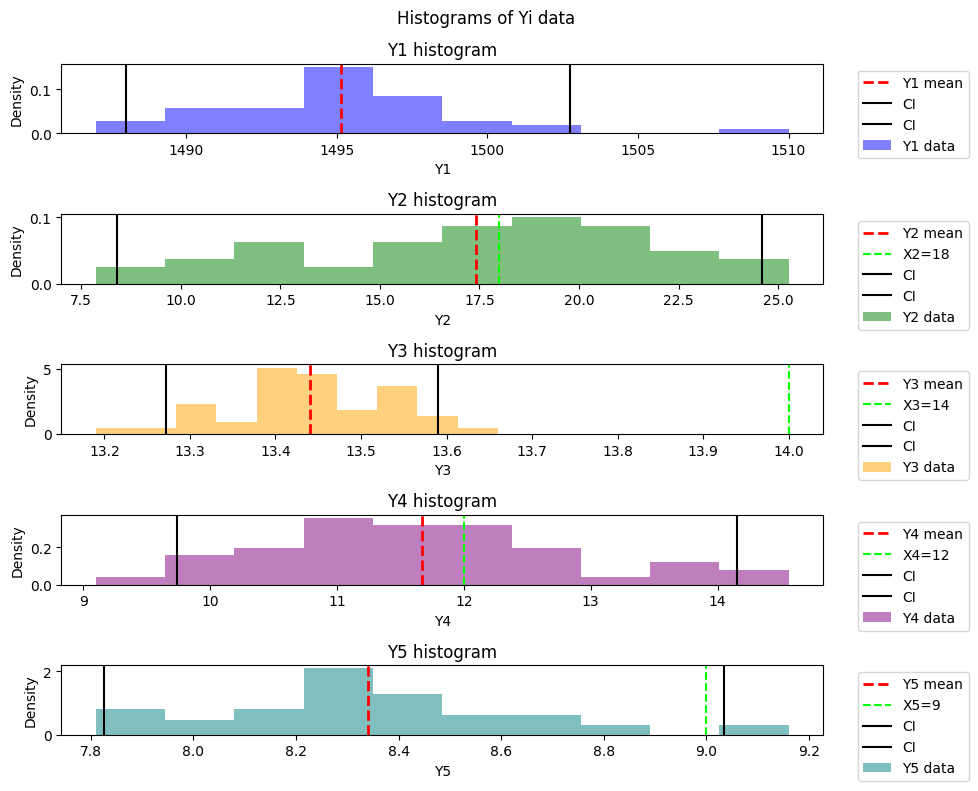

In [54]:
plot5hist(data,'Histograms of Yi data')

**looking at the histograms data we can see a that it might destribute normaly, lets plot normal destributions with our data**

In [59]:
def findnorm(data):
  #finding normal destribution
  ymean=data.mean()
  ystd=data.std()
  x = np.linspace(ymean - 3 * ystd, ymean + 3 * ystd, 100)
  y = (1 / (ystd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - ymean) / ystd) ** 2)
  return x,y


In [87]:
def plot5norm(data,title):

  #finding the CI
  conf = 0.95
  ci95_1 = np.percentile(data.Y1, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_2 = np.percentile(data.Y2, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_3 = np.percentile(data.Y3, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_4 = np.percentile(data.Y4, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_5 = np.percentile(data.Y5, [100*(1-conf)/2,100*(1-(1-conf)/2)])

  #finding normal destribution
  x1,y1=findnorm(data.Y1)
  x2,y2=findnorm(data.Y2)
  x3,y3=findnorm(data.Y3)
  x4,y4=findnorm(data.Y4)
  x5,y5=findnorm(data.Y5)


  fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))

  ax1.plot(x1, y1, color='blue')
  ax1.axvline(data.Y1.mean(), color='red', linestyle='dashed', linewidth=2)
  ax1.axvline(ci95_1[0], color='black', linestyle='solid', linewidth=1.5)
  ax1.axvline(ci95_1[1], color='black', linestyle='solid', linewidth=1.5)
  ax1.set_xlabel('Y1')
  ax1.set_ylabel('Density')
  ax1.set_title('Y1 normal distribution ')
  leg=['Y1 distribution ','mean' ,'CI','CI']
  ax1.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  ax2.plot(x2, y2, color='blue')
  ax2.axvline(data.Y2.mean(), color='red', linestyle='dashed', linewidth=2)
  ax2.axvline(data.X2[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax2.axvline(ci95_2[0], color='black', linestyle='solid', linewidth=1.5)
  ax2.axvline(ci95_2[1], color='black', linestyle='solid', linewidth=1.5)
  ax2.set_xlabel('Y2')
  ax2.set_ylabel('Density')
  ax2.set_title('Y2 normal distribution ')
  leg=['Y2 distribution ','mean','X2=18','CI','CI']
  ax2.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax3.plot(x3, y3, color='blue')
  ax3.axvline(data.Y3.mean(), color='red', linestyle='dashed', linewidth=2)
  ax3.axvline(data.X3[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax3.axvline(ci95_3[0], color='black', linestyle='solid', linewidth=1.5)
  ax3.axvline(ci95_3[1], color='black', linestyle='solid', linewidth=1.5)
  ax3.set_xlabel('Y3')
  ax3.set_ylabel('Density')
  ax3.set_title('Y3 normal distribution ')
  leg=['Y3 distribution ','mean','X3=14','CI','CI']
  ax3.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax4.plot(x4, y4, color='blue')
  ax4.axvline(data.Y4.mean(), color='red', linestyle='dashed', linewidth=2)
  ax4.axvline(data.X4[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax4.axvline(ci95_4[0], color='black', linestyle='solid', linewidth=1.5)
  ax4.axvline(ci95_4[1], color='black', linestyle='solid', linewidth=1.5)
  ax4.set_xlabel('Y4')
  ax4.set_ylabel('Density')
  ax4.set_title('Y4 normal distribution ')
  leg=['Y4 distribution ','mean','X4=12','CI','CI']
  ax4.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax5.plot(x5, y5, color='blue')
  ax5.axvline(data.Y5.mean(), color='red', linestyle='dashed', linewidth=2)
  ax5.axvline(data.X5[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax5.axvline(ci95_5[0], color='black', linestyle='solid', linewidth=1.5)
  ax5.axvline(ci95_5[1], color='black', linestyle='solid', linewidth=1.5)
  ax5.set_xlabel('Y5')
  ax5.set_ylabel('Density')
  ax5.set_title('Y5 normal distribution ')
  leg=['Y5 distribution ','mean','X5=9','CI','CI']
  ax5.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


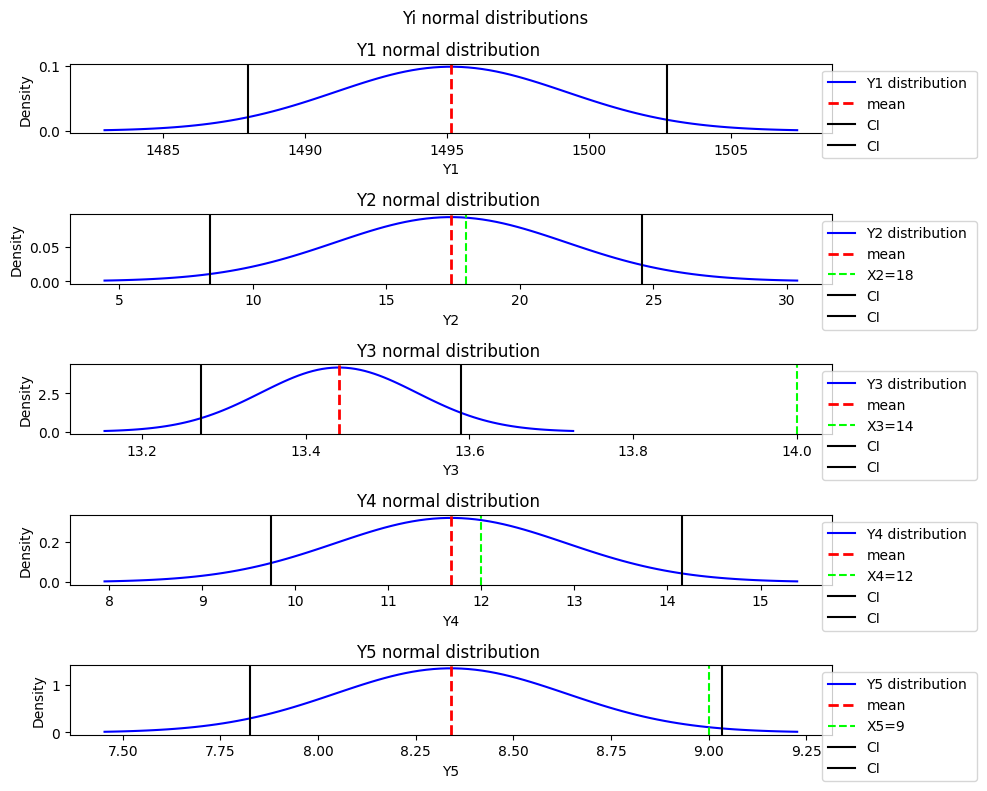

In [88]:
plot5norm(data,'Yi normal distributions')

looking at our histograms and normal destributions we can see that most of our data **does appear to behave normally.**

**for Y2 and Y4** - it seems that the mean of the data and the Xi value are close, this might indicate that our pupulation destributs normaly around the Xi value, and because the sample contains only 51 devices (and only 46 data samples that are workable) we have this diffrence.

**Looking at Y3** we see that the X3 value is not inside the CI and that no data points reach the X3 value, This might show that Y4(X4) is a max value not to reach, for example, temperature of failure.

**Looking at Y5** the X5 value is inside the CI but very close to the right side CI, This might show similarly to Y3(X3) that the X3 data is some kind of border for the data, but an accptable outcome.

**looking at the CI will allow us to later determine wheater the new devices belong inside our sample or not.**


# To understand Y1 that does not have a x value, let's check if there is a connection between Y1 and Yi using linear regression

In [82]:
def linreg(x,y):
  # calculate using formulas
  b1 = np.dot((x-x.mean()),(y-y.mean()))/ np.dot((x-x.mean()),(x-x.mean()))
  b0 = y.mean()-b1*x.mean()

  #print('b0 = {} , b1 = {}'.format(round(b0,4),round(b1,4)))
  yhat = b0+b1*x
  # effect size for regression model

  SSreg = np.dot((yhat-y.mean()),(yhat-y.mean()))
  SSres = np.dot((y-yhat),(y-yhat))
  SStot = np.dot((y-y.mean()),(y-y.mean()))

  R2 = SSreg/SStot

  f2 = SSreg/SSres

  #print('R2 = {} , f2 = {}'.format(round(R2,4),round(f2,4)))
  return  b0,b1,R2, f2, yhat


In [83]:
def plot4reg(data,title):

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

  b0,b1,R2,f2,yhat2 = linreg(data.Y2,data.Y1) #fitting the regression
  ax1.scatter(data.Y2,data.Y1)
  ax1.plot(data.Y2,yhat2, color = 'lime')
  ax1.set_xlabel('Y2')
  ax1.set_ylabel('Y1')
  ax1.set_title('Y1= {}+{}*(Y2)'.format(round(b0,3),round(b1,3)))
  leg=['data points','regression']
  ax1.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))
  print('Y1(Y2): R2={}, f2={}'.format(round(R2,4),round(f2,4)))

  b0,b1,R2,f2,yhat3 = linreg(data.Y3,data.Y1)#fitting the regression
  ax2.scatter(data.Y3,data.Y1)
  ax2.plot(data.Y3,yhat3, color = 'lime')
  ax2.set_xlabel('Y3')
  ax2.set_ylabel('Y1')
  ax2.set_title('Y1= {}+{}*(Y3)'.format(round(b0,3),round(b1,3)))
  leg=['data points','regression']
  ax2.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))
  print('Y1(Y3): R2={}, f2={}'.format(round(R2,4),round(f2,4)))

  b0,b1,R2,f2,yhat4 = linreg(data.Y4,data.Y1)#fitting the regression
  ax3.scatter(data.Y4,data.Y1)
  ax3.plot(data.Y4,yhat4, color = 'lime')
  ax3.set_xlabel('Y4')
  ax3.set_ylabel('Y1')
  ax3.set_title('Y1= {}+{}*(Y4)'.format(round(b0,3),round(b1,3)))
  leg=['data points','regression']
  ax3.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))
  print('Y1(Y4): R2={}, f2={}'.format(round(R2,4),round(f2,4)))

  b0,b1,R2,f2,yhat5 = linreg(data.Y5,data.Y1)#fitting the regression
  ax4.scatter(data.Y5,data.Y1)
  ax4.plot(data.Y5,yhat5, color = 'lime')
  ax4.set_xlabel('Y5')
  ax4.set_ylabel('Y1')
  ax4.set_title('Y1= {}+{}*(Y5)'.format(round(b0,3),round(b1,3)))
  leg=['data points','regression']
  ax4.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))
  print('Y1(Y5): R2={}, f2={}'.format(round(R2,4),round(f2,4)))

  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


Y1(Y2): R2=0.0003, f2=0.0003
Y1(Y3): R2=0.052, f2=0.0549
Y1(Y4): R2=0.0867, f2=0.0949
Y1(Y5): R2=0.055, f2=0.0582


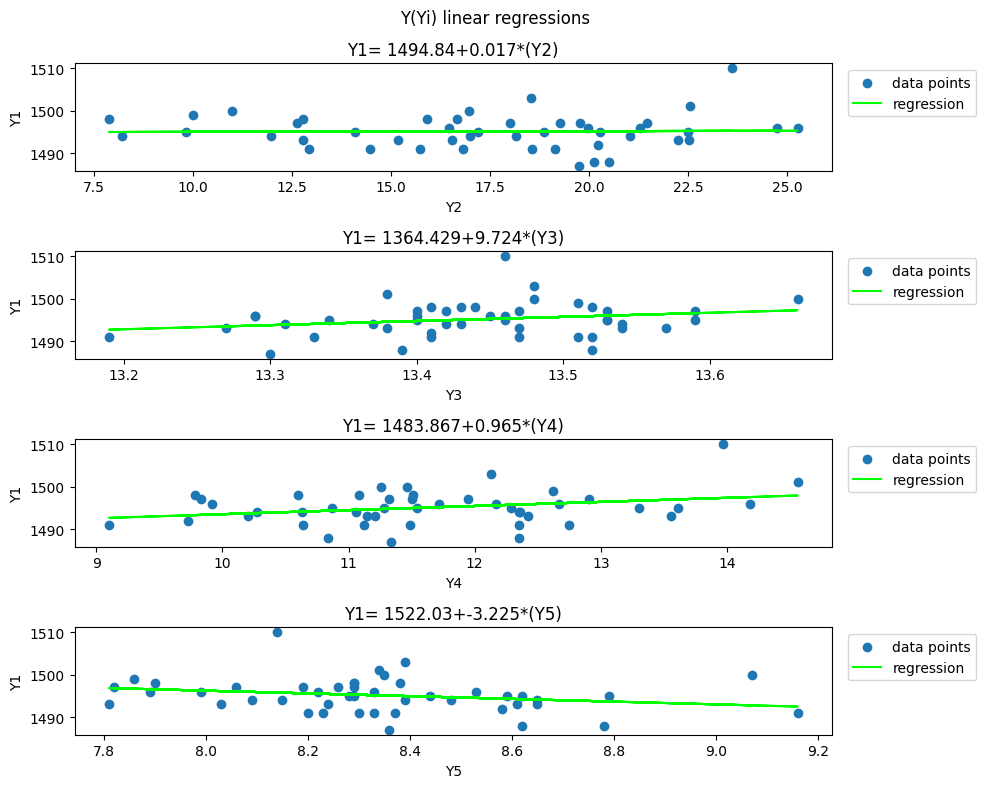

In [84]:
 plot4reg(data,'Y(Yi) linear regressions')


Looking at our linear regressions Y1(Yi) we can see that they are not a very good representation of the data. **R2 is very low and f2 is also not significant.**
I will try to analays the data using linear multivariate rgression

In [89]:
def multivariateReg(data):
  # try linear multivariate rgression

  y = data.Y1

  X = np.array([np.ones(len(data.Y1)), data.Y2, data.Y3,data.Y4,data.Y5])
  X = X.T

  b = np.linalg.inv(X.T@X)@X.T@y

  yhat = np.dot(X,b)

  Syx2 = (y-yhat).T@(y-yhat)/(len(y)-5)

  print('b0 = {} , b1 = {} , b2 = {}, b3 = {}, b4= {}, Syx2 = {}'.format(round(b[0],4),round(b[1],4),round(b[2],4),round(b[3],4),round(b[4],4),round(Syx2,4)))

  SSreg = np.dot((yhat-y.mean()),(yhat-y.mean()))
  vreg = 5-1
  MSreg = SSreg/vreg

  SSres = np.dot((yhat-y),(yhat-y))
  vres = len(y)-5
  MSres = SSres/vres

  R2 = SSreg/(SSreg+SSres)
  print('R2 = {} '.format(round(R2,4)))


In [90]:
multivariateReg(data)

b0 = 1379.5299 , b1 = 0.0202 , b2 = 9.4106, b3 = 0.8214, b4= -2.4969, Syx2 = 15.0975
R2 = 0.1671 


The multivariante regression did not give more significant results, R2 is still very low and it does not indicate that our data varies around those variables.

# **conclusion about our patterns and trends:**
we can see our data behaves similarly to a normal distribution - with Y2 and Y4 mean close to the X2 and X4 values.
for Y3 we see that the X value is outside the CI, indicating it is a sort of "stop value".
for Y5 we see that the X value is within the CI, but at close to the right side. that might indicate a "stop value", but one less strick than the Y3 value.
overall, we can consider our sample as representing the population and use its data, especially the CI, to find whether the new devices (part 4) came from the same population as the sample or not.

# **3. Data Preprocessing**
Perform any necessary preprocessing on the data:

the necessary preprocessing done on the data was:
1.   Change data to numeric values, Xi was not numeric.
2.   Change '[]' to NaN and later erase rows containing NaN. this made our data shorter and contained 47 valid data points out of the 51.
3. Remove one obvious outlier, one data point contained Y1 value about 500 units bigger than the rest of the data, and removing it allowed for a better view of the data.

# **4. Data Exploration**
You have also received another file called ‘new_devices.csv’ containing data for 3 additional devices. Please rank these new devices based on their probability of belonging to the sample group

**I am going to do that based on if they fall within the CI of our Yi data, for each one they fall within they will receive 1 point, 5 points being fits in our sample, 3-4 I will check the distance from our CI and re evaluate and less then 3 i will assume the new measurmant came from outside my sample.**

In [94]:
new_devices = new_devices.apply(pd.to_numeric)

new_devices.describe()

,ID,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
count,3.0,3.000000,3.0,3.000000,3.0,3.000000,3.0,3.000000,3.0,3.000000
mean,2.0,1516.333333,18.0,17.313333,14.0,13.460000,12.0,11.483333,9.0,8.233333
std,1.0,35.232561,0.0,1.089602,0.0,0.081854,0.0,0.187705,0.0,0.176163
min,1.0,1495.000000,18.0,16.150000,14.0,13.390000,12.0,11.280000,9.0,8.030000
25%,1.5,1496.000000,18.0,16.815000,14.0,13.415000,12.0,11.400000,9.0,8.180000
50%,2.0,1497.000000,18.0,17.480000,14.0,13.440000,12.0,11.520000,9.0,8.330000
75%,2.5,1527.000000,18.0,17.895000,14.0,13.495000,12.0,11.585000,9.0,8.335000
max,3.0,1557.000000,18.0,18.310000,14.0,13.550000,12.0,11.650000,9.0,8.340000


In [151]:
def checkinside(data,check):
  #finding the CI of all
  conf = 0.95
  ci95_1 = np.percentile(data.Y1, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_2 = np.percentile(data.Y2, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_3 = np.percentile(data.Y3, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_4 = np.percentile(data.Y4, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_5 = np.percentile(data.Y5, [100*(1-conf)/2,100*(1-(1-conf)/2)])

  ci95_all=[ci95_1,ci95_2,ci95_3,ci95_4,ci95_5]
  score=0
  test=np.zeros(len(ci95_all))
  if np.logical_and(check.Y1 > ci95_all[0][0], check.Y1 < ci95_all[0][1]):
    score=score+1
    test[0]=1
  if np.logical_and(check.Y2 > ci95_all[1][0], check.Y2 < ci95_all[1][1]):
    score=score+1
    test[1]=1
  if np.logical_and(check.Y3 > ci95_all[2][0], check.Y3 < ci95_all[2][1]):
    score=score+1
    test[2]=1
  if np.logical_and(check.Y4 > ci95_all[3][0], check.Y4 < ci95_all[3][1]):
    score=score+1
    test[3]=1
  if np.logical_and(check.Y5 > ci95_all[4][0], check.Y5 < ci95_all[0][1]):
    score=score+1
    test[4]=1

  return score, test

In [147]:
scores = []
for index, row in new_devices.iterrows():
    score = checkinside(data, row)
    scores.append(score)

new_devices['Scores'] = scores

# the updated new devices
print(new_devices)


   ID    Y1  X2     Y2  X3     Y3  X4     Y4  X5    Y5  Scores
0   1  1557  18  16.15  14  13.55  12  11.28   9  8.33       4
1   2  1497  18  18.31  14  13.44  12  11.65   9  8.34       5
2   3  1495  18  17.48  14  13.39  12  11.52   9  8.03       5


we can see that **device 1 is not a perfect fit for our sample, resulting in a score of 4/5.**
I will now check to see in what parameter it failed and how far was the data from the CI

**the other devices received a score of 5 - meaning they fit perfectly within our data.**


In [154]:
score,test=checkinside(data,new_devices.iloc[0])
print(test)

[0. 1. 1. 1. 1.]


Device ID1 failed at the Y1 - let's check of far from the mean and CI was our new data from the sample.

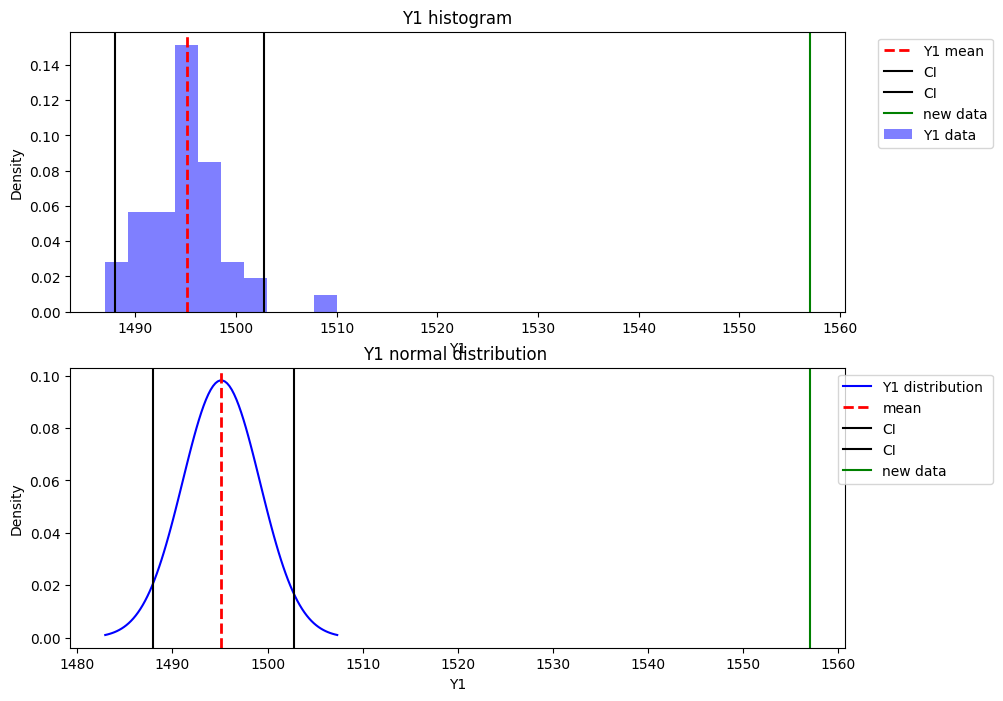

In [162]:
  #finding the CI
  conf = 0.95
  ci95_1 = np.percentile(data.Y1, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_2 = np.percentile(data.Y2, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_3 = np.percentile(data.Y3, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_4 = np.percentile(data.Y4, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci95_5 = np.percentile(data.Y5, [100*(1-conf)/2,100*(1-(1-conf)/2)])

  fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

  ax1.hist(data.Y1,  alpha=0.5, color='blue', density=True)
  ax1.axvline(data.Y1.mean(), color='red', linestyle='dashed', linewidth=2)
  ax1.axvline(ci95_1[0], color='black', linestyle='solid', linewidth=1.5)
  ax1.axvline(ci95_1[1], color='black', linestyle='solid', linewidth=1.5)
  ax1.axvline(x=new_devices.Y1[0], color='green', linestyle='solid', linewidth=1.5)
  ax1.set_xlabel('Y1')
  ax1.set_ylabel('Density')
  ax1.set_title('Y1 histogram')
  leg=['Y1 mean','CI','CI','new data','Y1 data']
  ax1.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  x1,y1=findnorm(data.Y1)
  ax2.plot(x1, y1, color='blue')
  ax2.axvline(data.Y1.mean(), color='red', linestyle='dashed', linewidth=2)
  ax2.axvline(ci95_1[0], color='black', linestyle='solid', linewidth=1.5)
  ax2.axvline(ci95_1[1], color='black', linestyle='solid', linewidth=1.5)
  ax2.axvline(x=new_devices.Y1[0], color='green', linestyle='solid', linewidth=1.5)
  ax2.set_xlabel('Y1')
  ax2.set_ylabel('Density')
  ax2.set_title('Y1 normal distribution ')
  leg=['Y1 distribution ','mean' ,'CI','CI','new data']
  ax2.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))